<a href="https://colab.research.google.com/github/SHREYA-A-J/AIML_LAB/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #data manipulation and handling data in tabular form
import numpy as np # for numerical computing
import nltk # text processing and handling human data
from nltk.sentiment import SentimentIntensityAnalyzer # analyse sentiment of social media{vader}
from sklearn.feature_extraction.text import TfidfVectorizer # converting text doc or clustering
from gensim import corpora #collecting doc and processing text
import gensim   #library vectorized representation of text
import matplotlib.pyplot as plt

In [4]:
# Download necessary NLTK data
nltk.download('vader_lexicon') #valence aware dictionary and sentiment reasoner
# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab')  #splitting  large data into smaller
# Download the missing 'stopwords' resource
nltk.download('stopwords') #removal of stopwords datapreprocessing

# Load the dataset
file_path = '/content/sample_data/Restaurant_Reviews.tsv'  # Path to your TSV file
df = pd.read_csv(file_path, sep='\t')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Display first few rows of the dataset
print(df.head())

# *** Check the actual column names ***
print(df.columns)

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
Index(['Review', 'Liked'], dtype='object')


In [6]:
# Step 1: Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to assign sentiment label based on polarity scores
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to review text
# *** Replace 'Review Text' with the actual column name 'Review' ***
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Check sentiment distribution
print(df['Sentiment'].value_counts())


Sentiment
positive    499
neutral     253
negative    248
Name: count, dtype: int64


In [7]:
# Step 2: Topic Modeling using Gensim (LDA)
# Preprocess text data: Tokenization and removing stopwords
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing
df['Processed_Text'] = df['Review'].apply(preprocess_text)
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['Processed_Text'])            #The dictionary is used to convert text into numerical representations that LDA can process.
corpus = [dictionary.doc2bow(text) for text in df['Processed_Text']]

# Train LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print the topics discovered by LDA
topics = lda_model.print_topics(num_words=5)  # weight indicates the probability or relevance of the word within the topic.
for topic in topics:
    print(topic)

(0, '0.010*"food" + 0.009*"definitely" + 0.009*"best" + 0.008*"back" + 0.008*"like"')
(1, '0.021*"place" + 0.016*"food" + 0.013*"back" + 0.011*"would" + 0.011*"service"')
(2, '0.024*"food" + 0.023*"great" + 0.021*"good" + 0.020*"service" + 0.016*"place"')


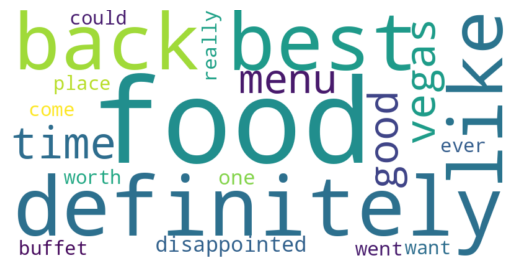

In [11]:
# Step 3: Visualize the topic distribution (optional)
# Display a word cloud for the first topic (visualization)
from wordcloud import WordCloud

# Extract the words from the first topic
topic_words = lda_model.show_topic(0, topn=20)    #retrieves the top 20 words for the topic with ID 0.
topic_words_dict = dict(topic_words)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words_dict)
plt.imshow(wordcloud, interpolation='bilinear')     #Displays the generated word cloud as an image.
plt.axis('off')
plt.show()                                             #Words with higher weights appear larger.#Words with lower weights appear smaller.


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

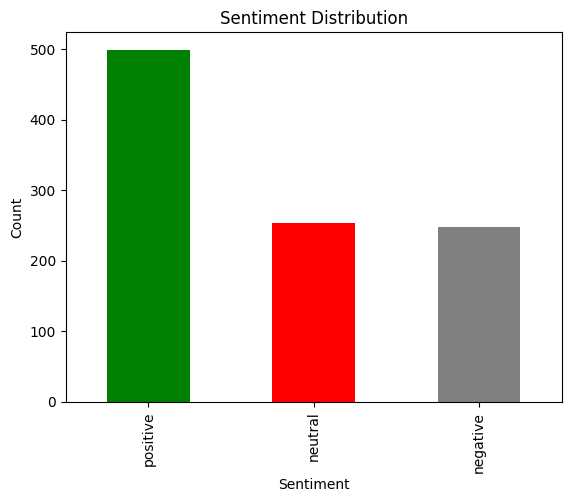

In [ ]:
# Step 4: Sentiment Analysis Visualization (Optional)
# Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'], title='Sentiment Distribution', ylabel='Count')
plt.xticks